In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.drop(['Unnamed: 0', 'ID'], axis='columns', inplace=True)

In [4]:
class clustering:

    def __init__(self, df):
        self.df = df
        self.pca_features = self.__applying_pca()

        
    def __scaling_data(self):
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        scaler.fit(self.df)
        scaled_data = scaler.transform(self.df)
        return scaled_data
    
    
    def __applying_pca(self):
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        scaled_data = self.__scaling_data()
        pca.fit(scaled_data)
        pca_features = pca.transform(scaled_data)
        return pca_features
    
    def elbow_plot(self):
        from sklearn.cluster import KMeans
        import matplotlib.pyplot as plt
        %matplotlib inline
        k_range = range(1, 11)
        sse = []
        
        for k in k_range:
            km = KMeans(n_clusters=k)
            km.fit(self.pca_features)
            sse.append(km.inertia_)
        plt.title("K vs SSE(choose k value)")
        plt.xlabel('K')
        plt.ylabel('SSE')
        plt.plot(k_range, sse)
        
    def fit_predict(self, k):
        try:
            from sklearn.cluster import KMeans
            km = KMeans(n_clusters=k)
            y_predicted = km.fit_predict(self.pca_features)
            return y_predicted
        except:
            print("supply the parameter no of clusteres(k value)")
    
    def plot_clusters(self, predicted):
        import matplotlib.pyplot as plt
        %matplotlib inline
        try:
            plt.scatter(self.pca_features[:, 0], self.pca_features[:, 1], c=predicted, cmap='plasma')
            plt.xlabel('pca1')
            plt.ylabel('pca2')
        except:
            print("supply the predicted parameters of clusters which is one dimensional array") 

In [5]:
c = clustering(df)

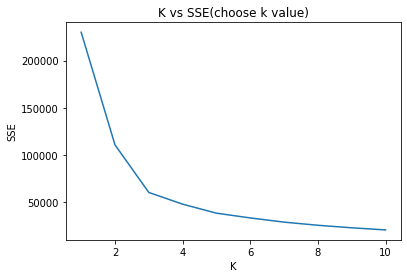

In [6]:
c.elbow_plot()

In [7]:
predicted = c.fit_predict(k=3)

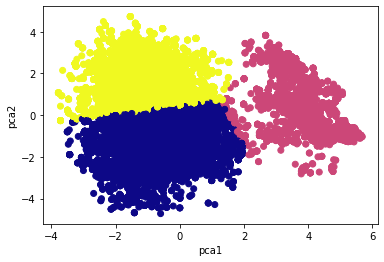

In [8]:
c.plot_clusters(predicted=predicted)